<a href="https://colab.research.google.com/github/dikoharyadhanto/Geokomputasi_Otomatisasi_GIS/blob/main/006_Manipulasi_Data_Raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

## Penjelasan Beberapa Library
1. **Geopandas** adalah library Python yang digunakan untuk mengolah data geospasial seperti shapefile, file GeoJSON, dan data raster. Geopandas memungkinkan pengguna untuk melakukan operasi geospatial seperti pengolahan data spasial, analisis spasial, manipulasi geometri, transformasi koordinat, pemetaan, dan visualisasi data.
2. **Shapely** adalah salah satu library Python yang digunakan untuk manipulasi geometri. Library ini menyediakan berbagai fitur untuk memanipulasi obyek geometri seperti titik, garis, dan poligon. Shapely dapat digunakan untuk melakukan operasi seperti transformasi geometri, penghitungan jarak, intersection, union, dan lain-lain. Shapely juga berintegrasi dengan library GIS lainnya seperti Geopandas dan Fiona untuk memudahkan dalam manipulasi data spasial.
3. **rioxarray** adalah sebuah library di Python yang digunakan untuk membaca, menulis, dan memanipulasi data raster geospasial. Library ini menggabungkan kekuatan dari beberapa library lain seperti rasterio, xarray, dan numpy untuk memudahkan proses manipulasi data raster geospasial.
4. **PyProj** adalah sebuah library di Python yang digunakan untuk melakukan transformasi koordinat geografis. Library ini memungkinkan pengguna untuk mengubah koordinat dari satu sistem proyeksi ke sistem proyeksi lainnya. PyProj mengandalkan library PROJ untuk melakukan transformasi koordinat.
5. **EarthPy** adalah library Python untuk analisis data geospatial yang mempermudah proses eksplorasi, manipulasi, dan analisis data citra satelit dan data geospasial lainnya. EarthPy berisi sejumlah besar fungsi dan alat untuk melakukan tugas-tugas umum seperti membaca, menulis, dan memproses data geospasial, termasuk plotting, reprojeksi, dan subset data.
6. **Rasterio** adalah library Python yang digunakan untuk membaca dan memproses data raster dalam berbagai format. 

## Install Library

In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 48.2 MB/s eta 0:00:00


In [4]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 56.5 MB/s eta 0:00:00


In [6]:
pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00


In [7]:
pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 KB 3.2 MB/s eta 0:00:00


## Import Library

In [8]:
import geopandas as gpd #import geopandas
from shapely.geometry import Point #mengimport class Point dari modul geometry pada package shapely.
from geopandas import GeoSeries, GeoDataFrame #mengimport geoseries dan geodataframe dari package geopandas

In [85]:
import rasterio as rio #import rasterio
import rasterio.plot as rioplot #mengimpor modul plot dari library Rasterio untuk visualisasi data raster yang muda dibaca
import rioxarray as rxr #import rioxarray
from rioxarray.merge import merge_arrays 
import pyproj #import pyproj
from rasterio.warp import calculate_default_transform, reproject, Resampling #untuk menghitung transformasi default dan reproyeksi ulang pada raster
from rasterio.mask import mask #untuk memotong area tertentu dari citra raster.
from rasterio.plot import show

In [10]:
import earthpy.spatial as es #untuk melakukan pengolahan data spasial, seperti transformasi koordinat, penggabungan citra (image stacking), klasifikasi citra, dan lain-lain. 
import earthpy.plot as ep #untuk visualisasi data spasial seperti plot 2D dan 3D, plot RGB, plot histogram, plot peta dasar, dan banyak lagi
import earthpy as et #import earthpy

In [11]:
import os #import os
import numpy as np #import numpy
import matplotlib #import matplotlib
import matplotlib.pyplot as plt #import module pyplot dari matplotlib

# Directory setting

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster")

In [14]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster'

# Akses data landsat google cloud

Saya akan mengakses citra Landsat 8 di daerah Kabupaten Gunung Kidul. Path Row yang digunakan adalah Path/Row 119/66 dan 120/65. Kita akan mendapatkan dua citra di tahun 2021 dan menggabungkan kedua citra tersebut

Buka console GCS di https://console.cloud.google.com/storage/browser/gcp-public-data-landsat


Index Dataset di BiqQuery https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=cloud_storage_geo_index&t=landsat_index&page=table&_ga=2.134364273.1637030914.1679715841-154397117.1679715003

In [15]:
from google.cloud import storage

#catat base_url dari citra satelitnya
base_url1 = 'gs://gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1'
base_url2 = 'gs://gcp-public-data-landsat/LC08/01/120/065/LC08_L1TP_120065_20210427_20210501_01_T1'

# Buat koneksi ke bucket di Google Cloud Storage
client = storage.Client()
bucket = client.bucket('gcp-public-data-landsat')

# Nama file yang ingin diakses
file_name1 = 'LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B1.TIF'
file_name2 = 'LC08/01/120/065/LC08_L1TP_120065_20210427_20210501_01_T1/LC08_L1TP_120065_20210427_20210501_01_T1_B1.TIF'

# Dapatkan objek blob dari file
blob1 = bucket.blob(file_name1)
blob2 = bucket.blob(file_name2)

# Dapatkan public URL dari file
url1 = blob1.public_url
url2 = blob2.public_url

print(url1)
print(url2)

https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B1.TIF
https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/120/065/LC08_L1TP_120065_20210427_20210501_01_T1/LC08_L1TP_120065_20210427_20210501_01_T1_B1.TIF


In [16]:
#copas public_url nya dan jadikan sebagai variabel
link1 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1'
link2 = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/120/065/LC08_L1TP_120065_20210427_20210501_01_T1/LC08_L1TP_120065_20210427_20210501_01_T1'

#Membuat dict kosong untuk menyimpan variabel-variabel dari public_url masing-masing band
fileBands1 = {}
fileBands2 = {}

#Gunakan looping untuk mendapatkan link public_url, hanya mengganti nomor Band saja pada link
for n in range(1,10):
  fileBands1['file1B{}'.format(n)] = link1 + '_B' + str(n) + '.TIF'
  fileBands2['file2B{}'.format(n)] = link2 + '_B' + str(n) + '.TIF'

In [17]:
print(fileBands1)
print(fileBands2)

{'file1B1': 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B1.TIF', 'file1B2': 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B2.TIF', 'file1B3': 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B3.TIF', 'file1B4': 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B4.TIF', 'file1B5': 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B5.TIF', 'file1B6': 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_

In [18]:
#Mengubah value dalam dictionary sebagai variabel-variabel baru
for key in fileBands1:
    # Buat variabel baru dengan nilai dari setiap kunci
    exec(f"{key} = fileBands1['{key}']")

In [19]:
#Mengubah value dalam dictionary sebagai variabel-variabel baru
for key in fileBands2:
    # Buat variabel baru dengan nilai dari setiap kunci
    exec(f"{key} = fileBands2['{key}']")

In [20]:
#contoh menampilkan public url dari citra landsat file 1 Band 1
print(file1B1)

https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/119/066/LC08_L1TP_119066_20210420_20210430_01_T1/LC08_L1TP_119066_20210420_20210430_01_T1_B1.TIF


## Citra 1 (Path 119, Row 66)

In [21]:
with rio.open(file1B1) as imgB1: #Membuka file citra raster
  rsL8b1 = imgB1.read() #Membaca seluruh citra raster yg terdapat pada objek dataset imgB1
  print('imgB1.profile: ', imgB1.profile) #Mencetak profil atau metadata dari file citra yg dibuka

with rio.open(file1B2) as imgB2:
  rsL8b2 = imgB2.read()
  print('imgB2.profile: ', imgB2.profile)

with rio.open(file1B3) as imgB3:
  rsL8b3 = imgB3.read()
  print('imgB2.profile: ', imgB3.profile)

with rio.open(file1B4) as imgB4:
  rsL8b4 = imgB4.read()
  print('imgB2.profile: ', imgB4.profile)

with rio.open(file1B5) as imgB5:
  rsL8b5 = imgB5.read()
  print('imgB2.profile: ', imgB5.profile)

imgB1.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7611, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 413085.0,
       0.0, -30.0, -843285.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7611, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 413085.0,
       0.0, -30.0, -843285.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7611, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 413085.0,
       0.0, -30.0, -843285.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'w

Alternatif code untuk simplifikasi: 


1.   membuat list file landsat
2.   membuat metadata dari 1 file yang akan digunakan untuk file stacking
3.   membuka dan melakukan layer stacking kemudian menyimpan file dengan nama Landsat8.tif pada directory utama
4.   memanggil ulang data tif 



In [22]:
# 1. List data landsat
fileL8_1 = [file1B1, file1B2, file1B3, file1B4, file1B5, file1B6, file1B7, file1B8, file1B9]

In [23]:
# 2. Create Metadata
r = rio.open(fileL8_1[0]) #Membuka file citra raster. Hanya membuka file citra pertama
meta = r.meta #Mengambil metadata yang dibuka dan menyimpannya dalam meta 
meta.update(count = len(fileL8_1)) #memperbarui metadata dengan menambahkan info jumlah band
meta.update(driver = "GTiff") #memperbarui metadata dengan menambah info tipe driver
print(meta) #mencetak metadata

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7611, 'height': 7741, 'count': 9, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 413085.0,
       0.0, -30.0, -843285.0)}


In [24]:
# 3. Membuka semua file kemudian menyimpannya sebagai file baru
with rio.open("GK_Landsat8_1.tif", "w", **meta) as dst: #Membuka file citra raster baru untuk ditulis. **meta ==> mengirim metadata ke file raster yg baru
    for id, layer in enumerate(fileL8_1, start = 1): #perulangan untuk membaca tiap file citra raster pada variabel
        with rio.open(layer) as src: #Membuka file citra raster asli
            dst.write(src.read(1), id) #menulis citra raster asli dari dataset src ke objek dataset dst

In [25]:
with rio.open("GK_Landsat8_1.tif") as imgL8_1: #Membuka file citra yang baru
  rsL8_1 = imgL8_1.read() #Membaca file citra yang baru
  print('imgL8.profile: ', imgL8_1.profile) #Mencetak metadata 

imgL8.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7611, 'height': 7741, 'count': 9, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 413085.0,
       0.0, -30.0, -843285.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


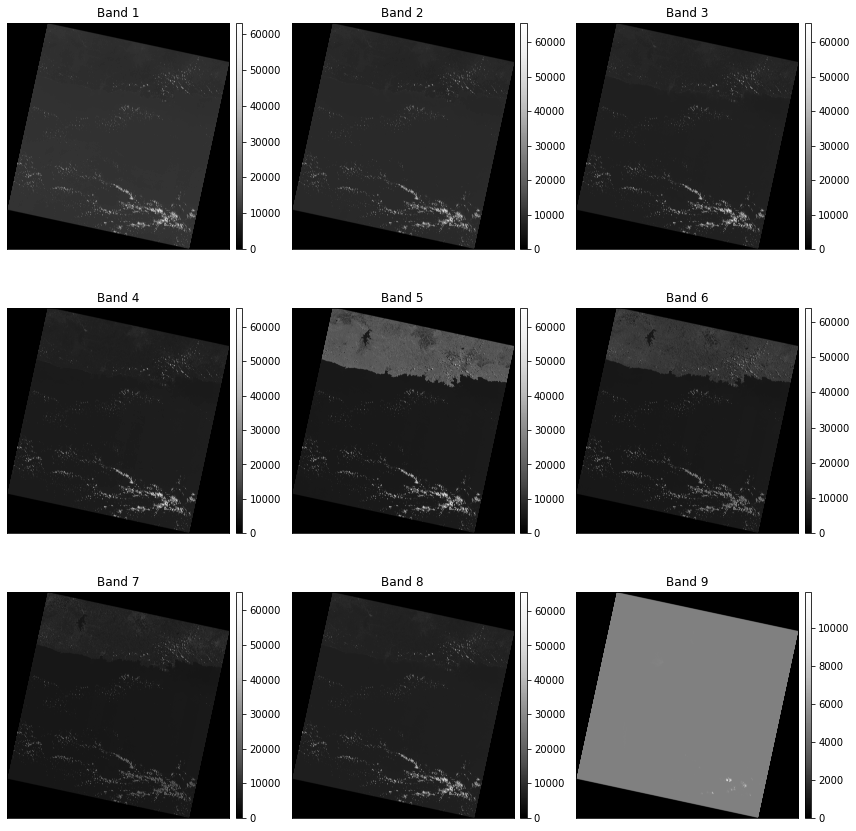

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>,
        <Axes: title={'center': 'Band 9'}>]], dtype=object)

In [26]:
ep.plot_bands(rsL8_1) #menampilkan citra raster per band

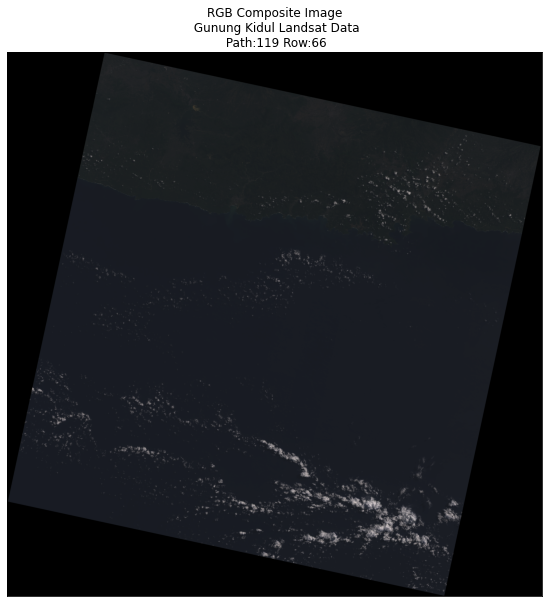

<Axes: title={'center': 'RGB Composite Image\n Gunung Kidul Landsat Data\n Path:119 Row:66'}>

In [27]:
ep.plot_rgb(rsL8_1, #menampilkan citra RGB
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Gunung Kidul Landsat Data\n Path:119 Row:66")

saat melakukan printah `print(image.profile)` maka informasi meta data dapat diketahui terutama sistem proyeksinya. Selalu pahami sistem proyeksi dari data raster yang digunakan. Kesalahan paling umum dari pengolahan data raster berbasis code adalah menggunakan data raster dengan sistem koordinat yang berbeda. 

## Citra 2 (Path 120, Row 65)

In [28]:
with rio.open(file2B1) as imgB1:
  rsL8b1 = imgB1.read()
  print('imgB1.profile: ', imgB1.profile)

with rio.open(file2B2) as imgB2:
  rsL8b2 = imgB2.read()
  print('imgB2.profile: ', imgB2.profile)

with rio.open(file2B3) as imgB3:
  rsL8b3 = imgB3.read()
  print('imgB2.profile: ', imgB3.profile)

with rio.open(file2B4) as imgB4:
  rsL8b4 = imgB4.read()
  print('imgB2.profile: ', imgB4.profile)

with rio.open(file2B5) as imgB5:
  rsL8b5 = imgB5.read()
  print('imgB2.profile: ', imgB5.profile)

imgB1.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7591, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 276885.0,
       0.0, -30.0, -683685.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7591, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 276885.0,
       0.0, -30.0, -683685.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7591, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 276885.0,
       0.0, -30.0, -683685.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
imgB2.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'w

Alternatif code untuk simplifikasi: 


1.   membuat list file landsat
2.   membuat metadata dari 1 file yang akan digunakan untuk file stacking
3.   membuka dan melakukan layer stacking kemudian menyimpan file dengan nama Landsat8.tif pada directory utama
4.   memanggil ulang data tif 



In [29]:
# 1. List data landsat
fileL8_2 = [file2B1, file2B2, file2B3, file2B4, file2B5, file2B6, file2B7, file2B8, file2B9]

In [30]:
# 2. Create Metadata
r = rio.open(fileL8_2[0])
meta = r.meta
meta.update(count = len(fileL8_2))
meta.update(driver = "GTiff")
print(meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7591, 'height': 7731, 'count': 9, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 276885.0,
       0.0, -30.0, -683685.0)}


In [31]:
# 3. Membuka semua file kemudian menyimpannya sebagai file baru
with rio.open("GK_Landsat8_2.tif", "w", **meta) as dst:
    for id, layer in enumerate(fileL8_2, start = 1):
        with rio.open(layer) as src:
            dst.write(src.read(1), id)

In [32]:
with rio.open("GK_Landsat8_2.tif") as imgL8_2:
  rsL8_2 = imgL8_2.read()
  print('imgL8.profile: ', imgL8_2.profile)

imgL8.profile:  {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7591, 'height': 7731, 'count': 9, 'crs': CRS.from_epsg(32649), 'transform': Affine(30.0, 0.0, 276885.0,
       0.0, -30.0, -683685.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


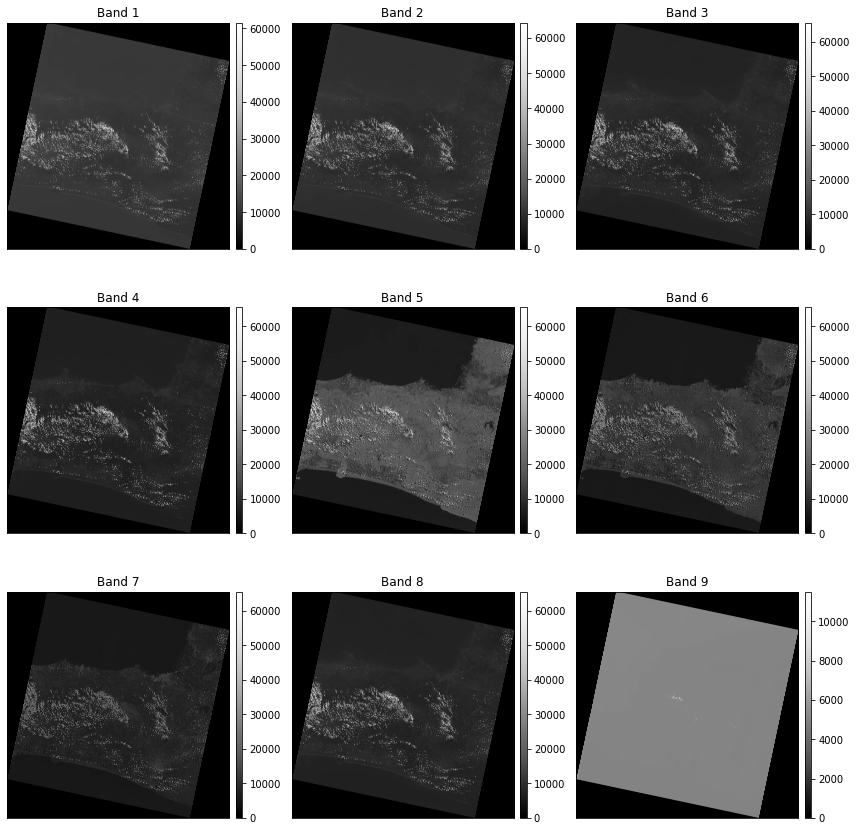

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>,
        <Axes: title={'center': 'Band 9'}>]], dtype=object)

In [33]:
ep.plot_bands(rsL8_2)

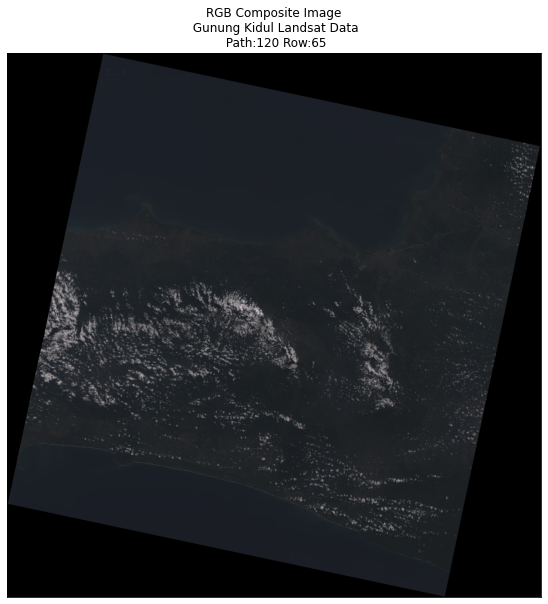

<Axes: title={'center': 'RGB Composite Image\n Gunung Kidul Landsat Data\n Path:120 Row:65'}>

In [34]:
ep.plot_rgb(rsL8_2,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Gunung Kidul Landsat Data\n Path:120 Row:65")

# Raster Data Manipulation

Terkait pengolahan data raster, penggunaan  library `rioarray` menurut saya lebih mempermudah karena file raster yang dibaca dengan library `rioarray` dapat memuat kedua informasi pixel dan metadatanya. 

## Projection

In [72]:
dst_crs = 'EPSG:32649' #Tentukan sistem proyeksi yang ingin digunakan

In [73]:
#Simpan path dari file raster yang sebelumnya disimpan ke dalam variabel
inRas1 = '/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster/GK_Landsat8_1.tif'
inRas2 = '/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster/GK_Landsat8_2.tif'

In [74]:
# membuka file raster dalam bentuk xarray.dataset dan menghapus dimensi yang ukurannya adalah 1
rsL8_1  = rxr.open_rasterio(inRas1, masked=True).squeeze()
rsL8_2 = rxr.open_rasterio(inRas2, masked=True).squeeze()

In [75]:
#mereprojeksikan data raster ke CRS (Coordinate Reference System) yang baru
#rsL8_1 = rsL8_1.rio.reproject(dst_crs)
#rsL8_2 = rsL8_1.rio.reproject(dst_crs)

#Menampilkan sistem koordinat yang digunakan
print('Raster 1 = ', rsL8_1.rio.crs)
print('Raster 2 = ', rsL8_2.rio.crs)

Raster 1 =  EPSG:32649
Raster 2 =  EPSG:32649


In [76]:
# menampilkan ukuran data array pada setiap dimensinya dalam data tuple
rsL8_1.shape

(9, 7741, 7611)

In [77]:
rsL8_2.shape

(9, 7731, 7591)

## Masking

In [78]:
#Masukkan file shapefile batas administrasi yang akan digunakan untuk masking
shape_file = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster/GK_ADM/GK_ADM_2.shp')

In [79]:
# cek sistem koordinat dari data shapefile
shape_file.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
#mendefinisikan path dari file yang nantinya akan disimpan setelah proses clipping
outRas1 = '/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster/Clipped1.tif'
outRas2 = '/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster/Clipped2.tif'


with rio.open(inRas1) as src: #membuka data raster pada file yang ditentukan
    Vector=shape_file.to_crs(src.crs) #mereprojeksikan shapefile ke CRS yang sama dengan data raster yang dibuka
    print(Vector.crs) #mencetak hasil proyeksi dari data vektor
    out_image, out_transform=mask(src,Vector.geometry,crop=True) #melakukan masking pada data raster dengan memanfaatkan geometri dari shapefile
    out_meta=src.meta.copy() # menduplikat metadata dari data raster yang dibuka
    
out_meta.update({ #memperbarui metadata hasil duplikasi dengan beberapa informasi tambahan
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})
              
with rio.open(outRas1,'w',**out_meta) as dst: #membuka file baru pada outRas1 yang akan digunakan untuk menyimpan hasil masking data raster.
    dst.write(out_image) #menulis data raster hasil masking ke dalam file baru yang telah dibuka

PROJCS["WGS 84 / UTM zone 49N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32649"]]


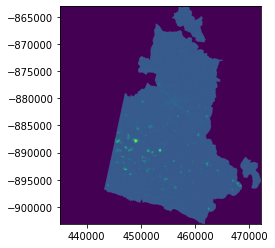

In [82]:
#menampilkan data raster dalam bentuk plot.
with rasterio.open(outRas1) as src:
  show(src)

In [83]:
with rasterio.open(inRas2) as src:
    Vector=shape_file.to_crs(src.crs)
    print(Vector.crs)
    out_image, out_transform=mask(src,Vector.geometry,crop=True)
    out_meta=src.meta.copy() # copy the metadata of the source DEM
    
out_meta.update({
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})
              
with rasterio.open(outRas2,'w',**out_meta) as dst:
    dst.write(out_image)

PROJCS["WGS 84 / UTM zone 49N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32649"]]


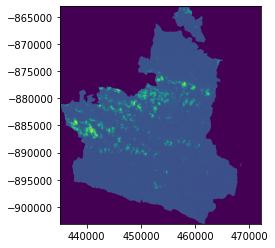

In [84]:
with rasterio.open(outRas2) as src:
  show(src)

## Mosaic

In [86]:
outmerged = "/content/drive/MyDrive/Colab Notebooks/Geokomputasi/006 - Manipulasi Data Raster/merged.tif"
 
# membaca file raster hasil clipping
tile_1 = riox.open_rasterio(outRas1)
tile_2 = riox.open_rasterio(outRas2)
 
# Menggabungkan berbagai file raster dengan metode merge_arrays dari rioxarray
merged_raster = merge_arrays(dataarrays = [tile_1, tile_2], res = (30, 30), crs="EPSG:32649", nodata = 0)
 
# Menyimpan file raster hasil mosaic
merged_raster.rio.to_raster(outmerged)

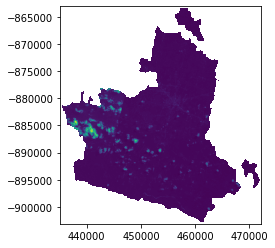

In [87]:
with rasterio.open(outmerged) as src:
  show(src)